# Geochronological Calculations

Import the required libraries. And set defaults.

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<figure class="half" style="display:flex">
    <img style="width:20" src="images/isochron_equation.png", width="500">
    <img style="width:20" src="images/decay rate.png", width="500">
    <figcaption></figcaption>
</figure>

## U-Pb Calculations

* Calculate and graph a Wetherill Concordia diagram assuming the 1975 IUGS constants
* Calculate and graph a Tera-Wasserburg Concordia diagram assuming the 1975 IUGS constants
* Calculate the 206Pb*/238U, 207Pb*/235U and 207Pb*/206Pb* ratios for a zircon formed at 3000 Ma, 2000 Ma, 1000 Ma, 500 Ma, 200 Ma and 100 Ma and plot these on both of the above graphs
* Graph Concordia curves on both Wetherill and Tera-Wasserburg plots using the most recently published decay constants and ratios for 238U and 235U decay. 
* Compare the old and new decay constant and ratio results

First we need to calculate the ratios needed for each plot. 

In [163]:
lambda238=1.55125*10**-10,
lambda235=9.8485*10**-10

def get_ratio_data(lambda238, lambda235, age=np.append([0.001], [np.arange(1,4568)])):
    df = pd.DataFrame()
    df["age"] = age
    df["ratio_238U_206Pb"] = 1/(np.exp(lambda238*df.age*1000000)-1)
    df["ratio_207Pb_235U"] = np.exp(lambda235*df.age*1000000)-1
    df["ratio_206Pb_238U"] = np.exp(lambda238*df.age*1000000)-1
    df["ratio_207Pb_206Pb"] = (1/137.88)*(df.ratio_207Pb_235U/df.ratio_206Pb_238U)    
    return df

df_1975 = get_ratio_data(lambda238, lambda235)
df_2020 = get_ratio_data(1.55*10**-10,9.72*10**-10)



In [164]:
print(df_1975.head())

     age  ratio_238U_206Pb  ratio_207Pb_235U  ratio_206Pb_238U  ratio_207Pb_206Pb
0  0.001      6.446414e+06      9.848505e-07      1.551250e-07           0.046046
1  1.000      6.445914e+03      9.853351e-04      1.551370e-04           0.046065
2  2.000      3.222707e+03      1.971641e-03      3.102981e-04           0.046084
3  3.000      2.148305e+03      2.958919e-03      4.654833e-04           0.046103
4  4.000      1.611104e+03      3.947170e-03      6.206925e-04           0.046122


In [165]:
print(df_2020.head())

     age  ratio_238U_206Pb  ratio_207Pb_235U  ratio_206Pb_238U  ratio_207Pb_206Pb
0  0.001      6.451612e+06      9.720005e-07      1.550000e-07           0.045481
1  1.000      6.451113e+03      9.724725e-04      1.550120e-04           0.045500
2  2.000      3.225306e+03      1.945891e-03      3.100481e-04           0.045519
3  3.000      2.150038e+03      2.920256e-03      4.651081e-04           0.045537
4  4.000      1.612403e+03      3.895568e-03      6.201922e-04           0.045556


In [166]:
def get_figure(xlim, ylim, figsize=(8,6), xlabel="", ylabel="", title=""):
    """ Generates a blank figure for Concordia Diagrams
        
        Parameters:
           xlim (list): x range for the diagram
           ylim (list): y range for the diagram
           figsize (tuple): figure size
           xlabel (string): x axis label
           ylabel (string): y axis label
           title (string): Title for the plot
                  
        Raises:
                   
        Returns:
            No return
    """
    fig = plt.figure(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

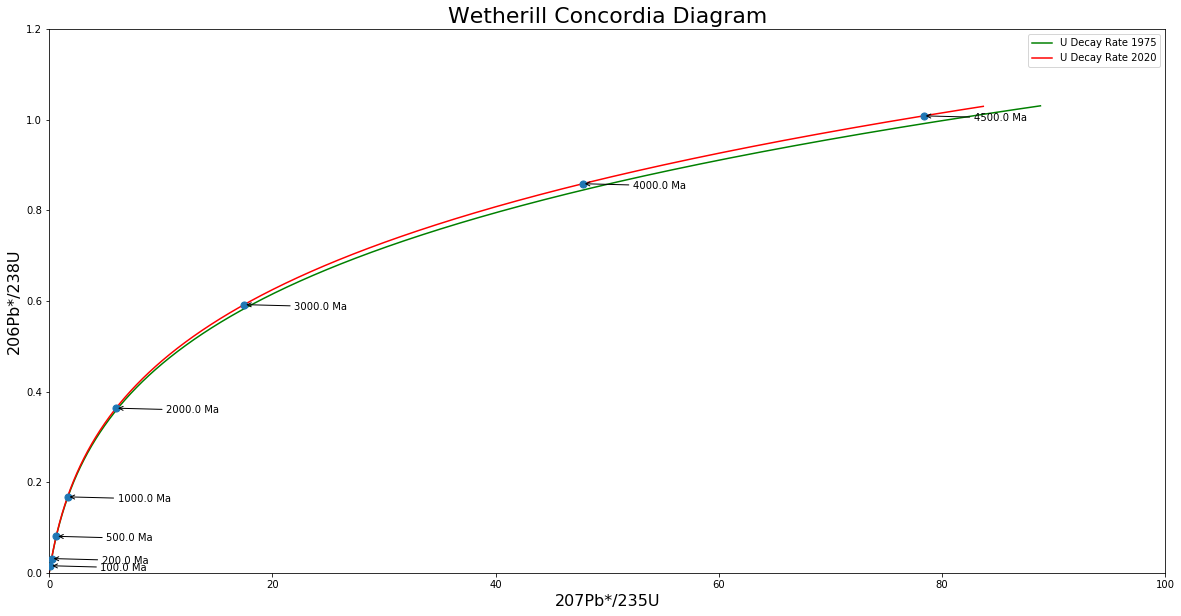

In [167]:
figsize = (20,10)
get_figure(figsize=figsize,
                    title="Wetherill Concordia Diagram",
                    xlabel="207Pb*/235U",
                    ylabel="206Pb*/238U",
                    xlim=[0,100],
                    ylim=[0,1.2])

plt.plot(df_1975["ratio_207Pb_235U"], df_1975["ratio_206Pb_238U"], 'g', label='U Decay Rate 1975', zorder=1)
plt.plot(df_2020["ratio_207Pb_235U"], df_2020["ratio_206Pb_238U"], 'r', label='U Decay Rate 2020', zorder=2)
ages = df_2020.loc[
             (df_2020['age'] == 100) |
             (df_2020['age'] == 200) |
             (df_2020['age'] == 500) |
             (df_2020['age'] == 1000) |
             (df_2020['age'] == 2000) |
             (df_2020['age'] == 3000) |
             (df_2020['age'] == 4000) |
             (df_2020['age'] == 4500)]

plt.scatter(ages["ratio_207Pb_235U"], ages["ratio_206Pb_238U"], marker="o", s=50, zorder=3)
for index, row in ages.iterrows():
        label = row.age
        label = str(label) + " Ma"
        plt.annotate(label,
             (row["ratio_207Pb_235U"], row["ratio_206Pb_238U"]),
             textcoords="offset points",
             xytext=(50,-5),
             arrowprops = dict(facecolor = 'blue',
                               arrowstyle = '->'),
                               ha='left')
plt.legend()
plt.show()

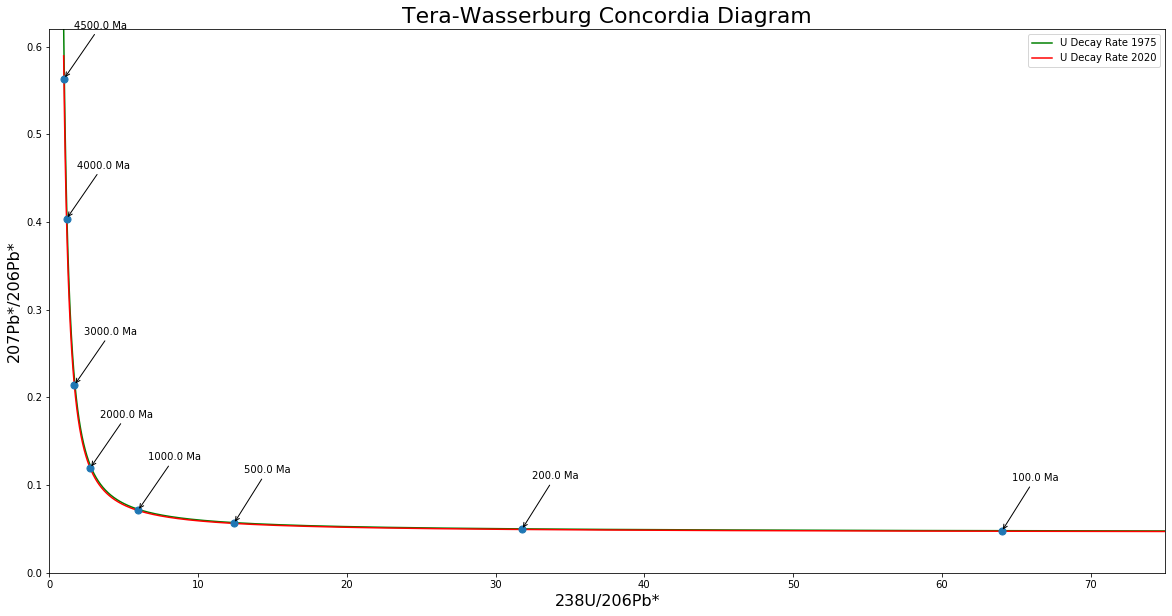

In [168]:
figsize = (20,10)
get_figure(figsize=figsize,
                    title="Tera-Wasserburg Concordia Diagram",
                    xlabel="238U/206Pb*",
                    ylabel="207Pb*/206Pb*",
                    xlim=[0,75],
                    ylim=[0,0.62])

plt.plot(df_1975["ratio_238U_206Pb"], df_1975["ratio_207Pb_206Pb"], 'g', label='U Decay Rate 1975', zorder=1)
plt.plot(df_2020["ratio_238U_206Pb"], df_2020["ratio_207Pb_206Pb"], 'r', label='U Decay Rate 2020', zorder=2)

plt.scatter(ages["ratio_238U_206Pb"], ages["ratio_207Pb_206Pb"], marker="o", s=50, zorder=3)
for index, row in ages.iterrows():
        label = row.age
        label = str(label) + " Ma"
        plt.annotate(label,
             (row["ratio_238U_206Pb"], row["ratio_207Pb_206Pb"]),
             textcoords="offset points",
             xytext=(10,50),
             arrowprops = dict(facecolor = 'blue',
                               arrowstyle = '->'),
                               ha='left')
plt.legend()
plt.show()

## Pb-Pb Calculations

Assume an initial 206Pb/204Pb starting composition of **16.0** and 238U/204Pb values of **0.1, 2.0, 9.74 and 50.0** for rocks and minerals formed at **2000** Ma. Calculate their present day 206Pb/204Pb compositions.

In [169]:
def calc_isochron_Pb(initial,
                     mu,
                     t1_age,
                     t2_age=0,
                     lambda238=1.55125*10**-10):
    return round(initial + (mu * (np.exp(lambda238*t1_age*1000000)-np.exp(lambda238*t2_age*1000000))),2)

In [170]:
mu_list = [0.1,2.0,9.74,50.0]
for mu in mu_list:
    print("The present day composition of 206Pb/204Pb initially at 16.0 and 238U/204Pb values of {} is {}.".format(mu,calc_isochron_Pb(16.0, mu, 2000, 0)))

The present day composition of 206Pb/204Pb initially at 16.0 and 238U/204Pb values of 0.1 is 16.04.
The present day composition of 206Pb/204Pb initially at 16.0 and 238U/204Pb values of 2.0 is 16.73.
The present day composition of 206Pb/204Pb initially at 16.0 and 238U/204Pb values of 9.74 is 19.54.
The present day composition of 206Pb/204Pb initially at 16.0 and 238U/204Pb values of 50.0 is 34.19.


## Rb-Sr Calculations

In [171]:
def calc_isochron_Sr(initial,
                     mu,
                     t1_age,
                     t2_age=0,
                     lambda87=1.42*10**-11):
    return round(initial + (mu * (np.exp(lambda87*t1_age*1000000)-np.exp(lambda87*t2_age*1000000))),2)

In [172]:
def calc_age_Sr(est_initial,
                mu,
                present_day,
                lambda87=1.42*10**-11):
    return round(np.log((present_day/mu - est_initial/mu + 1)) / lambda87 / 1000000, 4)

Assume an initial 87Sr/86Sr starting composition of **0.704** and 87Rb/86Sr values of **500.0** for a minerals (let’s say it is biotite) formed at **2000** Ma. 
Calculate the present day 87Sr/86Sr composition.

In [173]:
print("The present day 87Sr/86Sr composition is {} Ma.".format(calc_isochron_Sr(0.704, 500, 2000, 0)))

The present day 87Sr/86Sr composition is 15.11 Ma.


Assume you have measured present day 87Sr/86Srand 87Rb/86Sr compositions of **0.73** and **1000.0**, respectively in a mineral like biotite. 
Say you also have an estimate of the initial 87Sr/86Sr composition of the rock from some high-Sr concentration mineral like apatite with a value of **0.704**. 
Calculate the apparent age of the biotite.

In [174]:
print("The apparent age of the biotite is {} Ma.".format(calc_age_Sr(0.704,1000,0.73)))

The apparent age of the biotite is 1.831 Ma.


Repeat this calculation assuming the initial 87Sr/86Sr composition was **0.0**. 
Compare the two ages. 
Is there much difference in age?

In [175]:
print("The apparent age of this biotite is {} Ma.".format(calc_age_Sr(0.0,1000,0.73)))
print("This is a {} Ma difference from the previous biotite sample.".format(round(calc_age_Sr(0.0,1000,0.73)-calc_age_Sr(0.704,1000,0.73),4)))

The apparent age of this biotite is 51.3897 Ma.
This is a 49.5587 Ma difference from the previous biotite sample.


# Talk about this significance.

Take the first bullet and calculate 87Sr/86Sr at 500 Ma.  Note: I wasn't sure if this implied the minerals formed at 500 Ma, or the minerals formed at 2000 Ma and the calculation is asking for the ratio at 500 Ma (instead of present day), so I did both!

In [176]:
print("If formed 500 Ma the present day 87Sr/86Sr composition is {}.".format(calc_isochron_Sr(0.704,500,500, 0)))
print("If formed 2000 Ma the 500 Ma 87Sr/86Sr composition is {}.".format(calc_isochron_Sr(0.704,500,2000,500)))

If formed 500 Ma the present day 87Sr/86Sr composition is 4.27.
If formed 2000 Ma the 500 Ma 87Sr/86Sr composition is 11.54.


Assume an initial 87Sr/86Sr starting composition of 0.704 and 87Rb/86Sr values of 0.1, 10, 100 and 500.0 for a set of rocks and minerals formed at 2000 Ma. 
Calculate the present day 87Sr/86Sr compositions.

In [177]:
mu_list = [0.1,10,100,500.0]
for mu in mu_list:
    print("The present day composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of {} is {}.".format(mu,calc_present_day_comp_Sr(0.704, mu, 2000, 0)))

The present day composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 0.1 is 0.71.
The present day composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 10 is 0.99.
The present day composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 100 is 3.58.
The present day composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 500.0 is 15.11.


Assume the pluton was metamorphosed at 1000 Ma and the various rocks and minerals were homogenised. 
Take a simple average of the calculated 87Sr/86Sr at this time as the start of growth of the new mineral systems. 
Assume the newly formed minerals have 87Rb/86Sr values of 1.0, 5.0, 50.0 and 400.0. 
Calculate present day values. 
Calculate the slope of the original minerals and rocks and do the same for the metamorphic minerals. 
IOUExpress these slopes in terms of age. What are the initial ratios of the regression lines?

In [178]:
orig_mu_list = [0.1,10,100,500.0]
orig_total = 0
Ma_1000 = []
orig_df = pd.DataFrame()
for mu in orig_mu_list:
    at_1000_Ma = calc_isochron_Sr(0.704, mu, 2000, 1000)
    orig_total = orig_total + at_1000_Ma
    Ma_1000.append(at_1000_Ma)
    print("The 1000 Ma composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of {} is {}.".format(mu,at_1000_Ma))
    
average = orig_total / len(orig_mu_list)

print("At 1000 Ma the calculated average 87Sr/86Sr is ",round(average,3))

The 1000 Ma composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 0.1 is 0.71.
The 1000 Ma composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 10 is 0.85.
The 1000 Ma composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 100 is 2.15.
The 1000 Ma composition of 87Sr/86Sr initially at 0.704 and 87Rb/86Sr values of 500.0 is 7.96.
At 1000 Ma the calculated average 87Sr/86Sr is  2.918


In [179]:
metamorphic_mu_list = [1.0,5.0,50.0,400.0]
for mu in mu_list:
    print("The present day composition of 87Sr/86Sr initially at {} is {}.".format(mu,calc_isochron_Sr(average, mu, 1000,0)))

The present day composition of 87Sr/86Sr initially at 0.1 is 2.92.
The present day composition of 87Sr/86Sr initially at 10 is 3.06.
The present day composition of 87Sr/86Sr initially at 100 is 4.35.
The present day composition of 87Sr/86Sr initially at 500.0 is 10.07.


What is the MSWD for each of these lines?

# Pb-Pb Calculations

Assume an initial 206Pb/204Pb starting composition of 16.0 and 238U/204Pb values of 0.1, 2.0, 9.74 and 50.0 for rocks and minerals formed at 2000 Ma. Calculate their present day 206Pb/204Pb compositions.

Calculate their positions at 500 Ma.

Calculate 235U/204Pb equivalents of each ratio in the first bullet and repeat the calculations for 2000 Ma and 500 Ma for the 235U-207Pb isotope system.

Assume a starting composition equivalent to the Stacey and Kramers (1975) model at 3.7 Ga. Calculate model Pb-Pb curves for uranogenic and thorogenic lead for 238U/204Pb values of 9.0, 9.74 and 13.0 from 3.7 Ga to present day.

Assume that the more lower crustal of these curves had a lot of uranium introduced at 1000 Ma, resulting in a change of 238U/204Pb to 500.0. Plot the evolution curve and determine the present day composition.

Assume an initial 206Pb/204Pb starting composition of 16.0 and 238U/204Pb values of 0.1, 2.0, 9.74 and 50.0 for rocks and minerals formed at 2000 Ma. Calculate their present day 206Pb/204Pb compositions.

Assume a starting composition equivalent to the Stacey and Kramers (1975) model at 3.7 Ga. Calculate model Pb-Pb curves for uranogenic and thorogenic lead for 238U/204Pb values of 9.0, 9.74 and 13.0 from 3.7 Ga to present day.

Assume that the more lower crustal of these curves had a lot of uranium introduced at 1000 Ma, resulting in a change of 238U/204Pb to 500.0. Plot the evolution curve and determine the present day composition.

Assume a Stacey and Kramers (1975) second stage model and that you have two sets of igneous rocks which plot along curves defined by uranogenic lead isotope decay with slope of 0.06 and intercepts at 207Pb/204Pb = 14.2 and 15.0

What are the model source 238U/204Pb values implied for these two plutons? Determine these graphically.

What 238U/204Pb is required for each of these rock groups to reach the geochron?

## Sm-Nd Calculations

Start with an appropriate value for depleted mantle at 4570 Ma and calculate and graph the curve for depleted mantle.

Assume a crust generation event at 3000 Ma and another at 500 Ma, each starting from the depleted mantle curve. Assume these produce felsic crust with 147Sm/144Nd values of 0.11. Calculate and graph these two curves plus the curve for CHUR and for depleted mantle. 

# Lf-Hf Calculations

Start with an appropriate value for depleted mantle at 4570 Ma and calculate and graph the curve for depleted mantle.

Assume a crust generation event at 3000 Ma and another at 500 Ma, each starting from the depleted mantle curve. Assume these produce felsic crust with 176Lu/177Hf values of 0.15. Calculate and graph these two curves plus the curve for CHUR and for depleted mantle. 

Assume that the 3000 Ma crust melts at 1000 Ma to produce a felsic igneous rock which crystallises to form zircon with a 176Lu/177Hf vale of 0.00001. Calculate and graph the evolution of this zircon to the present day. 

# Sm-Nd Calculations

Assume an igneous rock sample is analysed and provides the following composition:
147Sm/144Nd = 0.1280
143Nd/144Nd = 0.512000

The igneous unit has previously been dated at 500 Ma by U-Pb

Calculate the initial composition (ratio and epsilon value). What is its T(DM) and T(2DM)?

Assume the crustal evolution history used in the previous assignment and determine possible scenarios for mixing of multiple end-members to explain the composition of the sample at its time of formation. Assume that Nd concentrations in mantle and crust are 0.86 and 22.6, respectively and that Sm concentrations are 0.80 and 22.0, respectively.

Illustrate the scenarios graphically in Excel for both ratio and epsilon situations.

# Lf-Hf Calculations

Assume that zircon from an igneous rock sample is analysed and provides the following composition:
176Lu/177Hf= 0.0003
176Hf/177Hf= 0.286000

The igneous unit has previously been dated at 500 Ma by U-Pb

Calculate the initial composition (ratio and epsilon value). What is its T(DM) and T(2DM)?

Assume the crustal evolution history used in the previous assignment and determine possible scenarios for mixing of multiple end-members to explain the composition of the zircon and host igneous rock sample at its time of formation. Assume that Hf concentrations in mantle and crust are 0.203 and 4.370, respectively and that Lu concentrations are 0.1 and 5.0, respectively.

Illustrate the scenarios graphically in Excel for both ratio and epsilon situations